<a href="https://colab.research.google.com/github/farizalmustaqim/Rakamin-Project/blob/main/Proyek_Akhir_Rakamin_Home_Credit_Indonesia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Akhir Rakamin Home Credit Indonesia

# Instruksi

Tahapan Pengerjaan
1. Download Dataset yang dibutuhkan.

2. Pelajari konteks masalah dari sumber eksternal untuk meningkatkan Subject Matter Knowledge.

3. Pahami deskripsi kolom yang tersedia.

4. Tentukan goal, objective, dan metrics dari masalah yang ada.

5. Lakukan penggalian informasi terkait kondisi data awal.

6. Lakukan proses Data Cleaning dan Data Processing.

7. Lakukan proses penggalian insight mengacu kepada objective yang sudah ditetapkan.

8. Lakukan pemodelan dengan berbagai macam metode (termasuk Logistic Regression) dan hyperparameternya.

9. Evaluasi hasil pemodelan.

10. Ukur seberapa besar dampak pemodelan dan rekomendasi bisnis terhadap metrics yang telah ditetapkan sebelumnya.

11. Push file .ipynb mu ke dalam github.

12. Buat file presentasi untuk menjelaskan pekerjaan yang telah dilakukan dan cantumkan link repo github di dalam ppt nya

# Introduction

## Import Library/Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.target import ClassBalance
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
import joblib


## Import Dataset

In [2]:
appl = pd.read_csv('/content/drive/MyDrive/home-credit-default-risk/Clean_Data.csv')
appl

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,103856,0,Cash loans,F,Y,N,1,2250000,7819200,424170.0,...,NaN,623.0,NaN,No,0.0,0.0,0.0,10.0,0.0,20.0
1,120392,0,Cash loans,M,N,Y,0,4050000,9856035,658665.0,...,block of flats,877.0,"Stone, brick",No,NaN,NaN,NaN,NaN,NaN,NaN
2,135040,0,Cash loans,F,N,Y,0,2070000,4725000,449910.0,...,block of flats,688.0,"Stone, brick",No,0.0,0.0,0.0,0.0,0.0,40.0
3,140156,0,Cash loans,M,Y,Y,1,1800000,4500000,478800.0,...,block of flats,1609.0,Panel,No,0.0,0.0,0.0,0.0,0.0,0.0
4,141914,0,Cash loans,M,Y,N,1,1800000,9703800,343800.0,...,block of flats,694.0,Block,No,0.0,0.0,0.0,0.0,0.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456243,0,Cash loans,F,N,Y,0,810000,2250000,126945.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,10.0,10.0,0.0
307507,456246,0,Cash loans,F,N,Y,1,945000,2250000,106200.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,10.0
307508,456247,0,Cash loans,F,N,Y,0,1125000,3455100,177705.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,10.0,0.0,20.0
307509,456248,0,Cash loans,F,N,Y,0,1530000,3319200,160965.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
appl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  int64  
 8   AMT_CREDIT                   307511 non-null  int64  
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

# Data Preprocessing

## Transformasi Data

Memindahkan label 'TARGET' index kolom terakhir

In [4]:
new_cols = [col for col in appl.columns if col != 'TARGET'] + ['TARGET']
appl = appl[new_cols]
appl

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
0,103856,Cash loans,F,Y,N,1,2250000,7819200,424170.0,6750000.0,...,623.0,NaN,No,0.0,0.0,0.0,10.0,0.0,20.0,0
1,120392,Cash loans,M,N,Y,0,4050000,9856035,658665.0,9315000.0,...,877.0,"Stone, brick",No,NaN,NaN,NaN,NaN,NaN,NaN,0
2,135040,Cash loans,F,N,Y,0,2070000,4725000,449910.0,4545000.0,...,688.0,"Stone, brick",No,0.0,0.0,0.0,0.0,0.0,40.0,0
3,140156,Cash loans,M,Y,Y,1,1800000,4500000,478800.0,4500000.0,...,1609.0,Panel,No,0.0,0.0,0.0,0.0,0.0,0.0,0
4,141914,Cash loans,M,Y,N,1,1800000,9703800,343800.0,8100000.0,...,694.0,Block,No,0.0,0.0,0.0,0.0,0.0,30.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456243,Cash loans,F,N,Y,0,810000,2250000,126945.0,2250000.0,...,NaN,NaN,NaN,0.0,0.0,0.0,10.0,10.0,0.0,0
307507,456246,Cash loans,F,N,Y,1,945000,2250000,106200.0,2250000.0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,10.0,0
307508,456247,Cash loans,F,N,Y,0,1125000,3455100,177705.0,2475000.0,...,NaN,NaN,NaN,0.0,0.0,0.0,10.0,0.0,20.0,0
307509,456248,Cash loans,F,N,Y,0,1530000,3319200,160965.0,2250000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


## Data Cleansing

Melakukan pengecekan terhadapa missing value pada dataset

In [5]:
appl.isna().sum()

SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        12
AMT_GOODS_PRICE                   278
NAME_TYPE_SUITE                  1292
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
OCCUPATION_TYPE                 96391
REGION_RATING_CLIENT                0
REGION_RATING_CLIENT_W_CITY         0
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
ORGANIZATION_TYPE                   0
FONDKAPREMONT_MODE             210295
HOUSETYPE_MODE                 154297
TOTALAREA_MODE                 148431
WALLSMATERIAL_MODE             156341
EMERGENCYSTATE_MODE            145755
AMT_REQ_CRED

Bisa dilihat karena terdapat kolom yang terlalu banyak missing valuenya maka kita drop kolom tersebut

In [6]:
appl.drop('SK_ID_CURR', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [7]:
appl.drop(appl.loc[:, 'FLAG_OWN_CAR':'FLAG_OWN_REALTY'].columns,axis = 1, inplace= True)
appl

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
0,Cash loans,F,1,2250000,7819200,424170.0,6750000.0,Unaccompanied,Working,Secondary / secondary special,...,623.0,NaN,No,0.0,0.0,0.0,10.0,0.0,20.0,0
1,Cash loans,M,0,4050000,9856035,658665.0,9315000.0,Unaccompanied,Commercial associate,Higher education,...,877.0,"Stone, brick",No,NaN,NaN,NaN,NaN,NaN,NaN,0
2,Cash loans,F,0,2070000,4725000,449910.0,4545000.0,Unaccompanied,State servant,Higher education,...,688.0,"Stone, brick",No,0.0,0.0,0.0,0.0,0.0,40.0,0
3,Cash loans,M,1,1800000,4500000,478800.0,4500000.0,Unaccompanied,Commercial associate,Higher education,...,1609.0,Panel,No,0.0,0.0,0.0,0.0,0.0,0.0,0
4,Cash loans,M,1,1800000,9703800,343800.0,8100000.0,Unaccompanied,Working,Higher education,...,694.0,Block,No,0.0,0.0,0.0,0.0,0.0,30.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,Cash loans,F,0,810000,2250000,126945.0,2250000.0,Unaccompanied,Commercial associate,Secondary / secondary special,...,NaN,NaN,NaN,0.0,0.0,0.0,10.0,10.0,0.0,0
307507,Cash loans,F,1,945000,2250000,106200.0,2250000.0,Unaccompanied,Working,Secondary / secondary special,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,10.0,0
307508,Cash loans,F,0,1125000,3455100,177705.0,2475000.0,Unaccompanied,Commercial associate,Higher education,...,NaN,NaN,NaN,0.0,0.0,0.0,10.0,0.0,20.0,0
307509,Cash loans,F,0,1530000,3319200,160965.0,2250000.0,Unaccompanied,Working,Secondary / secondary special,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [8]:
appl = appl.drop(appl.loc[:, 'FONDKAPREMONT_MODE':'AMT_REQ_CREDIT_BUREAU_QRT'].columns,axis = 1)
appl

,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
0,Cash loans,F,1,2250000,7819200,424170.0,6750000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,1,1,WEDNESDAY,8,Business Entity Type 2,20.0,0
1,Cash loans,M,0,4050000,9856035,658665.0,9315000.0,Unaccompanied,Commercial associate,Higher education,Single / not married,House / apartment,NaN,1,1,SATURDAY,17,Business Entity Type 3,NaN,0
2,Cash loans,F,0,2070000,4725000,449910.0,4545000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,Accountants,2,2,THURSDAY,15,Postal,40.0,0
3,Cash loans,M,1,1800000,4500000,478800.0,4500000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,Managers,2,2,WEDNESDAY,9,Business Entity Type 3,0.0,0
4,Cash loans,M,1,1800000,9703800,343800.0,8100000.0,Unaccompanied,Working,Higher education,Married,House / apartment,High skill tech staff,2,2,TUESDAY,14,Self-employed,30.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,Cash loans,F,0,810000,2250000,126945.0,2250000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,Medicine staff,2,2,TUESDAY,15,Medicine,0.0,0
307507,Cash loans,F,1,945000,2250000,106200.0,2250000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,2,2,MONDAY,16,School,10.0,0
307508,Cash loans,F,0,1125000,3455100,177705.0,2475000.0,Unaccompanied,Commercial associate,Higher education,Single / not married,House / apartment,Core staff,2,2,SATURDAY,11,Bank,20.0,0
307509,Cash loans,F,0,1530000,3319200,160965.0,2250000.0,Unaccompanied,Working,Secondary / secondary special,Separated,House / apartment,Sales staff,2,2,WEDNESDAY,11,Self-employed,NaN,0


Setelah di bersihkan dari kolom yang terlalu banyak mengandung Dilakukan handling missing value dengan nilai 0

In [9]:
appl = appl.fillna(0)

## Unique Value

In [10]:
def unik_value(df):
    col = []
    d_type = []
    uniques = []
    n_uniques = []
    
    for i in df.columns:
        col.append(i)
        d_type.append(df[i].dtypes)
        uniques.append(df[i].unique()[:5])
        n_uniques.append(df[i].nunique())
    
    return pd.DataFrame({'Nama Kolom': col, 'Tipe': d_type, 'Unik sample': uniques, 'Jumlah Unik Value': n_uniques})

In [11]:
unik_value(appl)

,Nama Kolom,Tipe,Unik sample,Jumlah Unik Value
0,NAME_CONTRACT_TYPE,object,"[Cash loans, Revolving loans]",2
1,CODE_GENDER,object,"[F, M, XNA]",3
2,CNT_CHILDREN,int64,"[1, 0, 2, 3, 4]",15
3,AMT_INCOME_TOTAL,int64,"[2250000, 4050000, 2070000, 1800000, 1125000]",2548
4,AMT_CREDIT,int64,"[7819200, 9856035, 4725000, 4500000, 9703800]",5603
5,AMT_ANNUITY,float64,"[424170.0, 658665.0, 449910.0, 478800.0, 34380...",13673
6,AMT_GOODS_PRICE,float64,"[6750000.0, 9315000.0, 4545000.0, 4500000.0, 8...",1003
7,NAME_TYPE_SUITE,object,"[Unaccompanied, Family, Spouse, partner, Other...",8
8,NAME_INCOME_TYPE,object,"[Working, Commercial associate, State servant,...",8
9,NAME_EDUCATION_TYPE,object,"[Secondary / secondary special, Higher educati...",5


# Exploratory Data Analysis

## Statistika Deskriptif

In [12]:
appl.describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
count,307511.000000,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,0.417052,1.693836e+06,5.990260e+06,2.710752e+05,5.379095e+06,2.052463,2.031521,12.063419,16.434469,0.080729
std,0.722121,2.613687e+06,4.024908e+06,1.449444e+05,3.696338e+06,0.509034,0.502737,3.265832,18.558207,0.272419
min,0.000000,2.565000e+05,4.500000e+05,0.000000e+00,0.000000e+00,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,1.125000e+06,2.700000e+06,1.652400e+05,2.385000e+06,2.000000,2.000000,10.000000,0.000000,0.000000
50%,0.000000,1.477665e+06,5.135310e+06,2.490300e+05,4.500000e+06,2.000000,2.000000,12.000000,10.000000,0.000000
75%,1.000000,2.025000e+06,8.086500e+06,3.459600e+05,6.795000e+06,2.000000,2.000000,14.000000,30.000000,0.000000
max,19.000000,1.170000e+09,4.050000e+07,2.580255e+06,4.050000e+07,3.000000,3.000000,23.000000,250.000000,1.000000


## Korelasi Dataset

In [13]:
appl.corr()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
CNT_CHILDREN,1.000000,0.011053,0.002145,0.021414,-0.002008,0.025423,0.024781,-0.007292,-0.029618,0.019187
AMT_INCOME_TOTAL,0.011053,1.000000,0.145565,0.175704,0.148133,-0.076088,-0.081664,0.033421,0.017301,-0.004277
AMT_CREDIT,0.002145,0.145565,1.000000,0.770080,0.986687,-0.101776,-0.110915,0.052738,-0.026404,-0.030369
AMT_ANNUITY,0.021414,0.175704,0.770080,1.000000,0.775063,-0.128457,-0.141615,0.052224,-0.005801,-0.012794
AMT_GOODS_PRICE,-0.002008,0.148133,0.986687,0.775063,1.000000,-0.103720,-0.112168,0.062089,-0.028479,-0.039565
REGION_RATING_CLIENT,0.025423,-0.076088,-0.101776,-0.128457,-0.103720,1.000000,0.950842,-0.285699,0.011498,0.058899
REGION_RATING_CLIENT_W_CITY,0.024781,-0.081664,-0.110915,-0.141615,-0.112168,0.950842,1.000000,-0.264815,0.011161,0.060893
HOUR_APPR_PROCESS_START,-0.007292,0.033421,0.052738,0.052224,0.062089,-0.285699,-0.264815,1.000000,-0.020892,-0.024166
AMT_REQ_CREDIT_BUREAU_YEAR,-0.029618,0.017301,-0.026404,-0.005801,-0.028479,0.011498,0.011161,-0.020892,1.000000,0.005522
TARGET,0.019187,-0.004277,-0.030369,-0.012794,-0.039565,0.058899,0.060893,-0.024166,0.005522,1.000000


# Feature Engineering

## Encoding

In [14]:
objList = appl.select_dtypes(include = "object").columns
print (objList)

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')


In [15]:
#Label Encoding untuk mengubah object menjadi tipe data numeric

le = LabelEncoder()
one = OneHotEncoder()
for feat in objList:
    appl[feat] = le.fit_transform(appl[feat].astype(str))


print (appl.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   NAME_CONTRACT_TYPE           307511 non-null  int64  
 1   CODE_GENDER                  307511 non-null  int64  
 2   CNT_CHILDREN                 307511 non-null  int64  
 3   AMT_INCOME_TOTAL             307511 non-null  int64  
 4   AMT_CREDIT                   307511 non-null  int64  
 5   AMT_ANNUITY                  307511 non-null  float64
 6   AMT_GOODS_PRICE              307511 non-null  float64
 7   NAME_TYPE_SUITE              307511 non-null  int64  
 8   NAME_INCOME_TYPE             307511 non-null  int64  
 9   NAME_EDUCATION_TYPE          307511 non-null  int64  
 10  NAME_FAMILY_STATUS           307511 non-null  int64  
 11  NAME_HOUSING_TYPE            307511 non-null  int64  
 12  OCCUPATION_TYPE              307511 non-null  int64  
 13 

In [16]:
appl

,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
0,0,0,1,2250000,7819200,424170.0,6750000.0,7,7,4,1,1,9,1,1,6,8,4,20.0,0
1,0,1,0,4050000,9856035,658665.0,9315000.0,7,1,1,3,1,0,1,1,2,17,5,0.0,0
2,0,0,0,2070000,4725000,449910.0,4545000.0,7,4,1,1,1,1,2,2,4,15,35,40.0,0
3,0,1,1,1800000,4500000,478800.0,4500000.0,7,1,1,1,1,11,2,2,6,9,5,0.0,0
4,0,1,1,1800000,9703800,343800.0,8100000.0,7,7,1,1,1,7,2,2,5,14,42,30.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,0,0,810000,2250000,126945.0,2250000.0,7,1,4,1,1,12,2,2,5,15,30,0.0,0
307507,0,0,1,945000,2250000,106200.0,2250000.0,7,7,4,1,1,9,2,2,1,16,39,10.0,0
307508,0,0,0,1125000,3455100,177705.0,2475000.0,7,1,1,3,1,4,2,2,2,11,2,20.0,0
307509,0,0,0,1530000,3319200,160965.0,2250000.0,7,7,4,2,1,15,2,2,6,11,42,0.0,0


In [17]:
appl.var()

NAME_CONTRACT_TYPE             8.614765e-02
CODE_GENDER                    2.249581e-01
CNT_CHILDREN                   5.214593e-01
AMT_INCOME_TOTAL               6.831357e+12
AMT_CREDIT                     1.619988e+13
AMT_ANNUITY                    2.100889e+10
AMT_GOODS_PRICE                1.366291e+13
NAME_TYPE_SUITE                3.301507e+00
NAME_INCOME_TYPE               6.474607e+00
NAME_EDUCATION_TYPE            1.686761e+00
NAME_FAMILY_STATUS             1.366291e+00
NAME_HOUSING_TYPE              9.047211e-01
OCCUPATION_TYPE                3.015132e+01
REGION_RATING_CLIENT           2.591155e-01
REGION_RATING_CLIENT_W_CITY    2.527445e-01
WEEKDAY_APPR_PROCESS_START     4.620401e+00
HOUR_APPR_PROCESS_START        1.066566e+01
ORGANIZATION_TYPE              4.187572e+02
AMT_REQ_CREDIT_BUREAU_YEAR     3.444070e+02
TARGET                         7.421192e-02
dtype: float64

## Split Feature dan Label

In [18]:
X = appl.iloc[:, 0:18]
y = appl.iloc[:, 19]

## Random Sampling

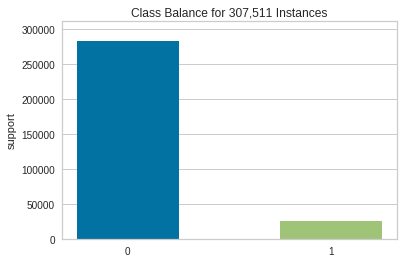

In [19]:
# Sebelum Random Sampling

check_proportion = ClassBalance()
check_proportion.fit(y)
check_proportion.show()

In [20]:
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)

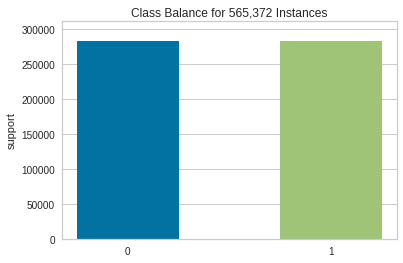

In [21]:
# Sesudah Random SMOTE Sampling

check_proportion = ClassBalance()
check_proportion.fit(y_smote)
check_proportion.show()

## Split Data Train dan Data Test

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state= 0)

## Feature Scalling

In [23]:
# data standarization with sklearn
# ﬁt scaler on training data
std = StandardScaler().ﬁt(X_train)

# transform training data
X_train_std = std.transform(X_train)
# transform testing dataabs
X_test_std = std.transform(X_test)


# Machine Learning Modelling

## Logistic Regression Model

In [26]:
model_logistic = LogisticRegression()
model_logistic.fit(X_train_std, y_train)

lr_prediction = model_logistic.predict(X_test_std)
print('Akurasi Logistik Regresi = ', metrics.accuracy_score(y_test,lr_prediction)*100,"%")



Akurasi Logistik Regresi =  64.50320583683396 %


Simpan model Logistic Regression

In [27]:
lr_model = 'model_logistic.sav'
joblib.dump(model_logistic, lr_model)

['model_logistic.sav']

## Random Forest Model

In [28]:
#Algoritma Random Forest

model_rf = RandomForestClassifier()
model_rf.fit(X_train_std, y_train)

rf_prediction = model_rf.predict(X_test_std)
print('Akurasi Random Forest = ', metrics.accuracy_score(y_test,rf_prediction)*100,"%")

Akurasi Random Forest =  91.61353084236127 %


Simpan model Random Forest

In [29]:
rf_model = 'model_random_forest.sav'
joblib.dump(model_rf, rf_model)

['model_random_forest.sav']

## Decision Tree

In [30]:
#Algoritma Decision Tree

model_dt = DecisionTreeClassifier()
model_dt.fit(X_train_std, y_train)

dt_prediction = model_dt.predict(X_test_std)
print('Akurasi Decision Tree = ', metrics.accuracy_score(y_test,dt_prediction)*100,"%")

Akurasi Decision Tree =  84.2653106345346 %


Simpan model Decission Tree

In [31]:
dt_model = 'model_decision_tree.sav'
joblib.dump(model_dt, dt_model)

['model_decision_tree.sav']

# Evaluation Machine Learning Model

## Logistic Regresion Evaluation Model

In [32]:
#Mengkomputasi performa model
NewprediksiBenar = (lr_prediction == y_test).sum()
NewprediksiSalah = (lr_prediction != y_test).sum()
    
print("prediksi benar         :", NewprediksiBenar, " data")
print("prediksi salah         :", NewprediksiSalah, " data")
print("Akurasi Algoritma      :", NewprediksiBenar/(NewprediksiBenar+NewprediksiSalah)*100,"%")

# Menggunakan Confusion Matrix untuk Model Evaluasi
CM = confusion_matrix(y_test,lr_prediction)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
precision    = TP/(TP+FP)
recall       = TP/(TP+FN)
f1 = 2*recall*precision/(recall+precision)

print ("TRUE NEGATIVE (TN)    :",TN)
print ("FALSE NEGATIVE (FN)   :",FN)
print ("TRUE POSITIVE (TP)    :",TP)
print ("FALSE POSITIVE (FP)   :",FP)
print ("PRECISION             :",precision*100,"%")
print ("RECALL                :",recall*100,"%")
print ("F1                    :",f1*100,"%")


prediksi benar         : 72937  data
prediksi salah         : 40138  data
Akurasi Algoritma      : 64.50320583683396 %
TRUE NEGATIVE (TN)    : 35078
FALSE NEGATIVE (FN)   : 18896
TRUE POSITIVE (TP)    : 37859
FALSE POSITIVE (FP)   : 21242
PRECISION             : 64.05813776416642 %
RECALL                : 66.7060170910052 %
F1                    : 65.3552686093081 %


In [33]:
print(classification_report(y_test,lr_prediction))

              precision    recall  f1-score   support

           0       0.65      0.62      0.64     56320
           1       0.64      0.67      0.65     56755

    accuracy                           0.65    113075
   macro avg       0.65      0.64      0.64    113075
weighted avg       0.65      0.65      0.64    113075



## Random Forest Evaluation Model

In [34]:
#Mengkomputasi performa model
NewprediksiBenar = (rf_prediction == y_test).sum()
NewprediksiSalah = (rf_prediction != y_test).sum()
    
print("prediksi benar         :", NewprediksiBenar, " data")
print("prediksi salah         :", NewprediksiSalah, " data")
print("Akurasi Algoritma      :", NewprediksiBenar/(NewprediksiBenar+NewprediksiSalah)*100,"%")

# Menggunakan Confusion Matrix untuk Model Evaluasi
CM = confusion_matrix(y_test,rf_prediction)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
precision    = TP/(TP+FP)
recall       = TP/(TP+FN)
f1 = 2*recall*precision/(recall+precision)

print ("TRUE NEGATIVE (TN)    :",TN)
print ("FALSE NEGATIVE (FN)   :",FN)
print ("TRUE POSITIVE (TP)    :",TP)
print ("FALSE POSITIVE (FP)   :",FP)
print ("PRECISION             :",precision*100,"%")
print ("RECALL                :",recall*100,"%")
print ("F1                    :",f1*100,"%")


prediksi benar         : 103592  data
prediksi salah         : 9483  data
Akurasi Algoritma      : 91.61353084236127 %
TRUE NEGATIVE (TN)    : 52986
FALSE NEGATIVE (FN)   : 6149
TRUE POSITIVE (TP)    : 50606
FALSE POSITIVE (FP)   : 3334
PRECISION             : 93.81905821282906 %
RECALL                : 89.16571227204652 %
F1                    : 91.43321739915984 %


In [35]:
print(classification_report(y_test,rf_prediction))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92     56320
           1       0.94      0.89      0.91     56755

    accuracy                           0.92    113075
   macro avg       0.92      0.92      0.92    113075
weighted avg       0.92      0.92      0.92    113075



## Decission Tree Evaluation Model

In [36]:
#Mengkomputasi performa model
NewprediksiBenar = (rf_prediction == y_test).sum()
NewprediksiSalah = (rf_prediction != y_test).sum()
    
print("prediksi benar         :", NewprediksiBenar, " data")
print("prediksi salah         :", NewprediksiSalah, " data")
print("Akurasi Algoritma      :", NewprediksiBenar/(NewprediksiBenar+NewprediksiSalah)*100,"%")

# Menggunakan Confusion Matrix untuk Model Evaluasi
CM = confusion_matrix(y_test,rf_prediction)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
precision    = TP/(TP+FP)
recall       = TP/(TP+FN)
f1 = 2*recall*precision/(recall+precision)

print ("TRUE NEGATIVE (TN)    :",TN)
print ("FALSE NEGATIVE (FN)   :",FN)
print ("TRUE POSITIVE (TP)    :",TP)
print ("FALSE POSITIVE (FP)   :",FP)
print ("PRECISION             :",precision*100,"%")
print ("RECALL                :",recall*100,"%")
print ("F1                    :",f1*100,"%")


prediksi benar         : 103592  data
prediksi salah         : 9483  data
Akurasi Algoritma      : 91.61353084236127 %
TRUE NEGATIVE (TN)    : 52986
FALSE NEGATIVE (FN)   : 6149
TRUE POSITIVE (TP)    : 50606
FALSE POSITIVE (FP)   : 3334
PRECISION             : 93.81905821282906 %
RECALL                : 89.16571227204652 %
F1                    : 91.43321739915984 %


# Deployment

## Logistic Regression Test

In [44]:
# muat model yang telah dibuat

loaded_model_lr = joblib.load(lr_model)
result = loaded_model_lr.score(X_test_std, y_test)
print('Akurasi Prediksi=',round(result,2)*100,'%')

Akurasi Prediksi= 65.0 %


## Random Forest Test

In [46]:
# muat model yang telah dibuat

loaded_model_rf = joblib.load(rf_model)
result = loaded_model_rf.score(X_test_std, y_test)
print('Akurasi Prediksi=',round(result,2)*100,'%')

Akurasi Prediksi= 92.0 %


## Decision Tree Test

In [45]:
# muat model yang telah dibuat

loaded_model_dt = joblib.load(dt_model)
result = loaded_model_dt.score(X_test_std, y_test)
print('Akurasi Prediksi=',round(result,2)*100,'%')

Akurasi Prediksi= 84.0 %


# Business Acumen

Dilihat dari pemodelan dan evaluasi diatas, didapatkan insight yang ketika pengujian menggunakan model Machine Learning Logistic Regression sebagai salah satu model klasifikasi untuk menentukan apakah nasabah Home Credit berhak mendapatkan pinjaman atau tidak dengan akurasi yang kurang memuaskan karena hanya mendapatkan akurasi prediksi sekitar 64% akan tetapi untuk Random Forest memiliki akurasi prediksi sampai 91 % dan Decission Tree sampai 84%.

Data akurasi tersebut didapat dari evaluasi model dengan Confusion Matrix dan sudah di validasi.

Model juga telah di deploy menggunakan data test yang sudah diolah menjadi data input sesuai dengan feature-feature yang ada pada data train.